In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


from sklearn.model_selection import cross_val_score
import xgboost as xgb
import lightgbm as lgb

from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler, Normalizer, FunctionTransformer
from sklearn.preprocessing import OneHotEncoder


from sklearn.model_selection import GridSearchCV

import seaborn as sns

import missingno as msno 

dashes = dashes='---'*20

import warnings
warnings.filterwarnings("ignore")

### Introduction
The Tanzanian Ministry of Water is seeking to solve the ongoing water crisis in Tanzania by increasing the number of functioning water wells.  It is crucial to the health and safety of communities that its residents have access to drinking water.  Tanzania has a lot of water wells that are non-functioning or in need of repair.  Predictive modeling can be used to aid in solving this problem. <br> 
<BR>
My objective is to build classification models that will predict the operating status of water wells based on features in the dataset.  The data was gathered by Taarifa from the Tanzanian Ministry of Water and consist of over 59,400 data points of water well pumps in Tanzania and 40 features. The data consists of features regarding the pumps, such as installer, install date, location and pump type, etc.  The data also includes a target variable indicating the status of the functionality of the pumps.  The functioning status of the wells are identifed as  functioning, non-functioning or functioning but in need of repairs.  
<BR>
In addition, I will provide an analysis and visualizations of the data to provide insights and information of how various features impact the operating status of water wells, e.g., does location of the wells impact the liklihood the wells will be functioning or non-functioning.  

## The Data

In [100]:
pd.set_option('display.max_columns', None)  
df_1 = pd.read_csv('data/water_table.csv')
labels = pd.read_csv('data/water_table_labels.csv')
df_1['target'] = labels['status_group']

In [101]:
df_1['target'] = df_1['target'].map({'functional':0,'non functional':1,'functional needs repair':2})
df_1.drop('id',axis=1, inplace=True)

In [102]:
df_1.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,target
0,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,0
1,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0
2,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,0
3,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,1
4,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0


In [103]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  object 
 2   funder                 55765 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              55745 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59400 non-null  object 
 8   num_private            59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region                 59400 non-null  object 
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga                    59400 non-null  object 
 15  wa

In [104]:
df_1['date_recorded'].max()

'2013-12-03'

## Data Cleaning

The following are issues with the data that need to be addressed.  These issues will be addressed by issue and feature.<br>
There are several features that have Null values.  We can impute the Null values with medium values of the feature.<br>
There are several columns have a 0 as the category and constitutes a significant part of the feature. 
There features are duplicates of other features in the dataset.  We will not include duplicate features in the dataset.<br>
There are several features that have object values and numerous unique features.  The features will need to be One-Hot encoded for modeling purposes. 

### Null Values
The features funder, installer, subvillage, public meeting, scheme_management, scheme_name, permit have object values and NaN values.  We will impute the NaN values with the median values of the features.

In [105]:
df_1.isna().sum()

amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity

In [106]:
def count_value_status(data, feature):
    #function provides count and percentage of each value
    vc= df_2[feature]
    count = vc.value_counts(dropna=False)
    percent = vc.value_counts(normalize=True)
    percent100 = vc.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
    count_df = pd.DataFrame({'count': count, 'per': percent,'%': percent100})
    return count_df 

In [107]:
df_2 = df_1.copy()

#### amount_tsh
This feature is defined as the total static head or the amount of water avaliable to waterpoint. According to below, 70% of the values of this feature are 0.  This is too big of a percentage to do any imputing of the values.

In [108]:
count_value_status(df_2, 'amount_tsh')

,count,per,%
0.0,41639,0.700993,70.1%
500.0,3102,0.052222,5.22%
50.0,2472,0.041616,4.16%
1000.0,1488,0.025051,2.51%
20.0,1463,0.024630,2.46%
...,...,...,...
8500.0,1,0.000017,0.0%
6300.0,1,0.000017,0.0%
220.0,1,0.000017,0.0%
138000.0,1,0.000017,0.0%


### funder
This feature has 3635 NaN values.  There is a value of 'O' so we can group all NaN value with those of 'O'.  In addition, this feature values are non-numeric and there are 1,897 unique values.  The unique values will be need to be One-Hot Encoded for modeling purposes.  We  will group all unique values of 100 or less and put them in a categery entitled 'Unknown'. 

In [109]:
count_value_status(df_2, 'funder')

,count,per,%
Government Of Tanzania,9084,0.162898,16.29%
NaN,3635,NaN,NaN
Danida,3114,0.055841,5.58%
Hesawa,2202,0.039487,3.95%
Rwssp,1374,0.024639,2.46%
...,...,...,...
Simango Kihengu,1,0.000018,0.0%
Nyabweta,1,0.000018,0.0%
Aixos,1,0.000018,0.0%
Ldcgd,1,0.000018,0.0%


In [110]:
df_2['funder'] = df_2['funder'].replace(np.nan, '0')

In [111]:
print(f"The number of unique categories in the feature funder are: {len(df_2['funder'].unique())}") 

The number of unique categories in the feature funder are: 1897


In [112]:
df_2 = df_2.apply(lambda x: x.mask(x.map(x.value_counts())< 100, 'other') if x.name=='funder' else x)

In [113]:
#pd.set_option('display.max_rows', None)
df_2['funder'].value_counts(dropna=False)

other                            12379
Government Of Tanzania            9084
0                                 4412
Danida                            3114
Hesawa                            2202
                                 ...  
Village Council                    105
Ru                                 105
Halmashauri Ya Wilaya Sikonge      102
Hsw                                101
Germany                            101
Name: funder, Length: 92, dtype: int64

In [114]:
df_2['funder'].isna().sum()

0

#### gps_height 
This feature has a value of 0 which is 34.4% of the feature.   

In [115]:
count_value_status(df_2, 'gps_height') 

,count,per,%
0,20438,0.344074,34.41%
-15,60,0.001010,0.1%
-16,55,0.000926,0.09%
-13,55,0.000926,0.09%
-20,52,0.000875,0.09%
...,...,...,...
2285,1,0.000017,0.0%
2424,1,0.000017,0.0%
2552,1,0.000017,0.0%
2413,1,0.000017,0.0%


In [116]:
mean = df_2['gps_height'][df_2['gps_height'] != 0].mean()
df_2['gps_height'].replace(0, mean, inplace=True)

In [117]:
count_value_status(df_2, 'gps_height') 

,count,per,%
1018.860839,20438,0.344074,34.41%
-15.000000,60,0.001010,0.1%
-13.000000,55,0.000926,0.09%
-16.000000,55,0.000926,0.09%
1290.000000,52,0.000875,0.09%
...,...,...,...
2285.000000,1,0.000017,0.0%
649.000000,1,0.000017,0.0%
2312.000000,1,0.000017,0.0%
2257.000000,1,0.000017,0.0%


#### installer
This feature is defined as the organization that installed the well.

In [118]:
count_value_status(df_2, 'installer')

,count,per,%
DWE,17402,0.312171,31.22%
NaN,3655,NaN,NaN
Government,1825,0.032738,3.27%
RWE,1206,0.021634,2.16%
Commu,1060,0.019015,1.9%
...,...,...,...
Claver,1,0.000018,0.0%
Water Aid/Maji tech,1,0.000018,0.0%
Zao,1,0.000018,0.0%
TLC/Jenus Malecha,1,0.000018,0.0%


#### Longitude
This feature is defined as the GPS coordinate.  #% of this feature has a value of 0.  I used the mean value of the feature to impute the 0 value.

In [119]:
count_value_status(df_2, 'longitude') 

,count,per,%
0.000000,1812,0.030505,3.05%
37.540901,2,0.000034,0.0%
33.010510,2,0.000034,0.0%
39.093484,2,0.000034,0.0%
32.972719,2,0.000034,0.0%
...,...,...,...
37.579803,1,0.000017,0.0%
33.196490,1,0.000017,0.0%
34.017119,1,0.000017,0.0%
33.788326,1,0.000017,0.0%


In [120]:
longitude_mean = df_2[df_2['longitude']>0]['longitude'].mean()
df_2.loc[df_2['longitude']==0.00, 'longitude'] = float(longitude_mean)

In [121]:
df_2['longitude'].value_counts(normalize=True)

35.149669    0.030505
33.090347    0.000034
39.086287    0.000034
39.098514    0.000034
38.180538    0.000034
               ...   
37.579803    0.000017
33.196490    0.000017
34.017119    0.000017
33.788326    0.000017
35.005922    0.000017
Name: longitude, Length: 57516, dtype: float64

#### Latitude
This feature is defined as the GPS coordinate.

In [122]:
#df_2['latitude'].value_counts(normalize=True)
count_value_status(df_2, 'latitude') 

,count,per,%
-2.000000e-08,1812,0.030505,3.05%
-6.985842e+00,2,0.000034,0.0%
-3.797579e+00,2,0.000034,0.0%
-6.981884e+00,2,0.000034,0.0%
-7.104625e+00,2,0.000034,0.0%
...,...,...,...
-5.726001e+00,1,0.000017,0.0%
-9.646831e+00,1,0.000017,0.0%
-8.124530e+00,1,0.000017,0.0%
-2.535985e+00,1,0.000017,0.0%


In [123]:
latitude_mean = df_2[df_2['latitude']>0]['latitude'].mean()
df_2.loc[df_2['latitude']==0, 'latitude'] = float(latitude_mean)

#### wpt_name and num_private
wpt_name is defined as the name of the name of the well.  This feature is an object and has 37,400 unique values.  This would be toom any to One_Hot Encode for modeling purposes and will not be included in the dataset.<br>

For num_private, 98.7% of the feature has a value of 0.  This is too many values to impute and will not be included in the dataset.  

In [124]:
df_2['wpt_name'].nunique()

37400

In [125]:
count_value_status(df_2, 'num_private') 

,count,per,%
0,58643,0.987256,98.73%
6,81,0.001364,0.14%
1,73,0.001229,0.12%
5,46,0.000774,0.08%
8,46,0.000774,0.08%
...,...,...,...
180,1,0.000017,0.0%
213,1,0.000017,0.0%
23,1,0.000017,0.0%
55,1,0.000017,0.0%


#### basin
This is feature is defined as the geographic water basin.

In [126]:
count_value_status(df_2, 'basin') 

,count,per,%
Lake Victoria,10248,0.172525,17.25%
Pangani,8940,0.150505,15.05%
Rufiji,7976,0.134276,13.43%
Internal,7785,0.131061,13.11%
Lake Tanganyika,6432,0.108283,10.83%
Wami / Ruvu,5987,0.100791,10.08%
Lake Nyasa,5085,0.085606,8.56%
Ruvuma / Southern Coast,4493,0.075640,7.56%
Lake Rukwa,2454,0.041313,4.13%


In [127]:
"""
subvillage : Geographic location
region : Geographic location

region_code : Geographic location (coded)
district_code : Geographic location (coded)

"""
count_value_status(df_2, 'region_code') 

,count,per,%
11,5300,0.089226,8.92%
17,5011,0.084360,8.44%
12,4639,0.078098,7.81%
3,4379,0.073721,7.37%
5,4040,0.068013,6.8%
18,3324,0.055960,5.6%
19,3047,0.051296,5.13%
2,3024,0.050909,5.09%
16,2816,0.047407,4.74%
10,2640,0.044444,4.44%


In [128]:
count_value_status(df_2, 'district_code') 

,count,per,%
1,12203,0.205438,20.54%
2,11173,0.188098,18.81%
3,9998,0.168316,16.83%
4,8999,0.151498,15.15%
5,4356,0.073333,7.33%
6,4074,0.068586,6.86%
7,3343,0.056279,5.63%
8,1043,0.017559,1.76%
30,995,0.016751,1.68%
33,874,0.014714,1.47%


#### LGA and Ward
These features are both defined as the geographic location of the wells.  LGA  has 125 unique value and ward has 2092 unique values.

In [129]:
"""
lga                    59400 non-null  object 
 15  ward  
"""
count_value_status(df_2, 'lga') 

,count,per,%
Njombe,2503,0.042138,4.21%
Arusha Rural,1252,0.021077,2.11%
Moshi Rural,1251,0.021061,2.11%
Bariadi,1177,0.019815,1.98%
Rungwe,1106,0.018620,1.86%
...,...,...,...
Moshi Urban,79,0.001330,0.13%
Kigoma Urban,71,0.001195,0.12%
Arusha Urban,63,0.001061,0.11%
Lindi Urban,21,0.000354,0.04%


In [130]:
len(count_value_status(df_2, 'ward')) 

2092

In [131]:
df_2 = df_2.apply(lambda x: x.mask(x.map(x.value_counts())< 100, 'Other') if x.name=='lga' else x)

In [132]:
count_value_status(df_2, 'lga') 

,count,per,%
Njombe,2503,0.042138,4.21%
Arusha Rural,1252,0.021077,2.11%
Moshi Rural,1251,0.021061,2.11%
Bariadi,1177,0.019815,1.98%
Rungwe,1106,0.018620,1.86%
...,...,...,...
Tabora Urban,155,0.002609,0.26%
Liwale,154,0.002593,0.26%
Ilemela,142,0.002391,0.24%
Mafia,132,0.002222,0.22%


#### Population
population is defined as the population around the well.  36% of water wells have 0 population around them.


In [133]:
count_value_status(df_2, 'population') 

,count,per,%
0,21381,0.359949,35.99%
1,7025,0.118266,11.83%
200,1940,0.032660,3.27%
150,1892,0.031852,3.19%
250,1681,0.028300,2.83%
...,...,...,...
3241,1,0.000017,0.0%
1960,1,0.000017,0.0%
1685,1,0.000017,0.0%
2248,1,0.000017,0.0%


In [134]:
population_mean = df_2[df_2['population']>0]['population'].mean()
df_2.loc[df_2['population']==0, 'population'] = int(population_mean)

In [135]:
count_value_status(df_2, 'population') 

,count,per,%
281,21385,0.360017,36.0%
1,7025,0.118266,11.83%
200,1940,0.032660,3.27%
150,1892,0.031852,3.19%
250,1681,0.028300,2.83%
...,...,...,...
406,1,0.000017,0.0%
1960,1,0.000017,0.0%
1685,1,0.000017,0.0%
2248,1,0.000017,0.0%


#### public_meeting

In [136]:
count_value_status(df_2, 'public_meeting') 

,count,per,%
False,5055,0.090162,9.02%
True,51011,0.909838,90.98%
NaN,3334,NaN,NaN


In [137]:
m=df_2["public_meeting"].mode()[0]
df_2["public_meeting"].fillna(m,inplace=True)

In [138]:
df_2['public_meeting'] = list(map(int, df_2['public_meeting']))

In [139]:
count_value_status(df_2, 'public_meeting') 

,count,per,%
1,54345,0.914899,91.49%
0,5055,0.085101,8.51%


#### scheme_management
scheme_management : Who operates the waterpoint
scheme_name : Who operates the waterpoint

In [140]:
count_value_status(df_2, 'scheme_management') 

,count,per,%
VWC,36793,0.662662,66.27%
WUG,5206,0.093763,9.38%
NaN,3877,NaN,NaN
Water authority,3153,0.056787,5.68%
WUA,2883,0.051924,5.19%
Water Board,2748,0.049493,4.95%
Parastatal,1680,0.030258,3.03%
Private operator,1063,0.019145,1.91%
Company,1061,0.019109,1.91%
Other,766,0.013796,1.38%


In [141]:
df_2['scheme_management'] = np.where(df_2['scheme_management'].isnull(),"Unknown",df_2['scheme_management'])

In [142]:
count_value_status(df_2, 'scheme_management') 

,count,per,%
VWC,36793,0.619411,61.94%
WUG,5206,0.087643,8.76%
Unknown,3877,0.065269,6.53%
Water authority,3153,0.053081,5.31%
WUA,2883,0.048535,4.85%
Water Board,2748,0.046263,4.63%
Parastatal,1680,0.028283,2.83%
Private operator,1063,0.017896,1.79%
Company,1061,0.017862,1.79%
Other,766,0.012896,1.29%


In [143]:
"""
permit is defined as if the well is permitted or not.
There are 38852 NaN value.  We can impute NaN to the category with most values.  We need to als also convet the boleean values to 
numeric.

"""
count_value_status(df_2, 'permit') 

,count,per,%
False,17492,0.31045,31.05%
True,38852,0.68955,68.95%
NaN,3056,NaN,NaN


In [144]:
#m=df_2["permit"].mode()


In [145]:
m=df_2["permit"].mode()[0]
df_2["permit"].fillna(m,inplace=True)

In [146]:
count_value_status(df_2, 'permit') 

,count,per,%
True,41908,0.705522,70.55%
False,17492,0.294478,29.45%


In [147]:
df_2['permit'] = list(map(int, df_2['permit']))

In [148]:
count_value_status(df_2, 'permit') 

,count,per,%
1,41908,0.705522,70.55%
0,17492,0.294478,29.45%


#### construction_year
The feature construction_year is defined as the year the waterpoint was constructed.  Unfortnately, 34% of the feature is categorized as 0.  I will replacing the 0 values from the construction year column with the average year year values for the feature. With the cleaned construction year feature I will use feature engineering to create a pump age and an average popultion served per year feature.

In [149]:
count_value_status(df_2, 'construction_year') 

,count,per,%
0,20709,0.348636,34.86%
2010,2645,0.044529,4.45%
2008,2613,0.043990,4.4%
2009,2533,0.042643,4.26%
2000,2091,0.035202,3.52%
2007,1587,0.026717,2.67%
2006,1471,0.024764,2.48%
2003,1286,0.021650,2.16%
2011,1256,0.021145,2.11%
2004,1123,0.018906,1.89%


In [150]:
"""
X_test['construction_year'] = X_test['construction_year'].replace({0:1993})

mean_yr = df_2[df_2['construction_year']>0]['construction_year'].mean()
df_2.loc[df_2['construction_year']==0, 'construction_year'] = int(mean_yr)
"""
mean = df_2['construction_year'][df_2['construction_year'] != 0].mean()
df_2.construction_year.replace(0, mean, inplace=True)

In [151]:
count_value_status(df_2, 'construction_year') 

,count,per,%
1996.814686,20709,0.348636,34.86%
2010.000000,2645,0.044529,4.45%
2008.000000,2613,0.043990,4.4%
2009.000000,2533,0.042643,4.26%
2000.000000,2091,0.035202,3.52%
2007.000000,1587,0.026717,2.67%
2006.000000,1471,0.024764,2.48%
2003.000000,1286,0.021650,2.16%
2011.000000,1256,0.021145,2.11%
2004.000000,1123,0.018906,1.89%


#### extraction_type_class
The features extraction_type, extraction_type_group, extraction_type_class are defined as the kind of extraction the waterpoint uses.  I only included extraction_type_class in the dataset.

In [152]:
count_value_status(df_2, 'extraction_type_class') 

,count,per,%
gravity,26780,0.450842,45.08%
handpump,16456,0.277037,27.7%
other,6430,0.108249,10.82%
submersible,6179,0.104024,10.4%
motorpump,2987,0.050286,5.03%
rope pump,451,0.007593,0.76%
wind-powered,117,0.001970,0.2%


#### management
Both management and management_group are defined as how the waterpoints are managed.  I only included management in the dataset.

In [153]:
count_value_status(df_2, 'management') 

,count,per,%
vwc,40507,0.681936,68.19%
wug,6515,0.109680,10.97%
water board,2933,0.049377,4.94%
wua,2535,0.042677,4.27%
private operator,1971,0.033182,3.32%
parastatal,1768,0.029764,2.98%
water authority,904,0.015219,1.52%
other,844,0.014209,1.42%
company,685,0.011532,1.15%
unknown,561,0.009444,0.94%


In [185]:
df_2.groupby(['management', 'management_group']).size()

management        management_group
company           commercial            685
other             other                 844
other - school    other                  99
parastatal        parastatal           1768
private operator  commercial           1971
trust             commercial             78
unknown           unknown               561
vwc               user-group          40507
water authority   commercial            904
water board       user-group           2933
wua               user-group           2535
wug               user-group           6515
dtype: int64

#### payment
The features payment and payment_type are defined as what the water costs.  I only included payment in the dataset. 

In [154]:
"""
payment
payment-what the water costs
payment_type
"""
count_value_status(df_2, 'payment') 

,count,per,%
never pay,25348,0.426734,42.67%
pay per bucket,8985,0.151263,15.13%
pay monthly,8300,0.139731,13.97%
unknown,8157,0.137323,13.73%
pay when scheme fails,3914,0.065892,6.59%
pay annually,3642,0.061313,6.13%
other,1054,0.017744,1.77%


#### quality_group
Both water_quality and quality_group are defined as the quality of the water.  I only included quality_group in the dataset.

In [155]:
"""
water_quality - the quality of water
quality_group - the quality of water
"""
count_value_status(df_2, 'quality_group') 

,count,per,%
good,50818,0.855522,85.55%
salty,5195,0.087458,8.75%
unknown,1876,0.031582,3.16%
milky,804,0.013535,1.35%
colored,490,0.008249,0.82%
fluoride,217,0.003653,0.37%


#### quantity_group

In [156]:
"""
quantity- the quantity of water
quantity_group

"""
count_value_status(df_2, 'quantity_group') 

,count,per,%
enough,33186,0.558687,55.87%
insufficient,15129,0.254697,25.47%
dry,6246,0.105152,10.52%
seasonal,4050,0.068182,6.82%
unknown,789,0.013283,1.33%


#### Source
The features source, source_type and source_class are defined as the source of the water.  The features are duplicates with some variations.  I included only source in the dataset.

In [157]:
count_value_status(df_2, 'source') 

,count,per,%
spring,17021,0.286549,28.65%
shallow well,16824,0.283232,28.32%
machine dbh,11075,0.186448,18.64%
river,9612,0.161818,16.18%
rainwater harvesting,2295,0.038636,3.86%
hand dtw,874,0.014714,1.47%
lake,765,0.012879,1.29%
dam,656,0.011044,1.1%
other,212,0.003569,0.36%
unknown,66,0.001111,0.11%


#### waterpoint_type
Both features waterpoint_type and waterpoint_type_group have the same defintion and are defined as the kind of waterpoint.  I only included waterpoint_type in the dataset. 

In [158]:
count_value_status(df_2, 'waterpoint_type') 

,count,per,%
communal standpipe,28522,0.480168,48.02%
hand pump,17488,0.294411,29.44%
other,6380,0.107407,10.74%
communal standpipe multiple,6103,0.102744,10.27%
improved spring,784,0.013199,1.32%
cattle trough,116,0.001953,0.2%
dam,7,0.000118,0.01%


In [159]:
df_4 = df_2.copy()

#### age
With feature engineering I created a feature to identify the age of the wells.

In [160]:
# features['construction_year'] = features['construction_year'].replace({0:1993})
df_2['age'] = df_2['date_recorded'].astype(str).str[:4].astype(int) - df_2['construction_year']
df_2['pop_per_year'] = df_2['population'].replace({0:1}) / df_2['age'].replace({0:1})

In [161]:
count_value_status(df_2, 'age') 

,count,per,%
14.185314,13343,0.224630,22.46%
15.185314,5142,0.086566,8.66%
3.000000,2740,0.046128,4.61%
1.000000,2303,0.038771,3.88%
16.185314,2210,0.037205,3.72%
...,...,...,...
-3.000000,1,0.000017,0.0%
-2.000000,1,0.000017,0.0%
-1.000000,1,0.000017,0.0%
-7.000000,1,0.000017,0.0%


In [162]:
# X_test['age'] = X_test['date_recorded'].astype(str).str[:4].astype(int) - X_test['construction_year']
# X_test['pop/year'] = X_test['population'].replace({0:1}) / X_test['age'].replace({0:1})
df_2.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,target,age,pop_per_year
0,6000.0,2011-03-14,Roman,1390.000000,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,1,GeoData Consultants Ltd,VWC,Roman,0,1999.000000,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,0,12.000000,9.083333
1,0.0,2013-03-06,other,1399.000000,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,1,GeoData Consultants Ltd,Other,NaN,1,2010.000000,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0,3.000000,93.333333
2,25.0,2013-02-25,other,686.000000,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,1,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,1,2009.000000,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,0,4.000000,62.500000
3,0.0,2013-01-28,Unicef,263.000000,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,1,GeoData Consultants Ltd,VWC,NaN,1,1986.000000,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,1,27.000000,2.148148
4,0.0,2011-07-13,other,1018.860839,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,281,1,GeoData Consultants Ltd,Unknown,NaN,1,1996.814686,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0,14.185314,19.809219


## Exploratory Data Analysis 

In [166]:
df_2.describe()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,public_meeting,permit,construction_year,target,age,pop_per_year
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,1018.860839,35.149669,-5.706033e+00,0.474141,15.297003,5.629747,281.055791,0.914899,0.705522,1996.814686,0.529596,15.106981,43.561193
std,2997.574558,496.110517,2.567349,2.946019e+00,12.236230,17.587406,9.633649,451.765815,0.279034,0.455812,10.065781,0.628080,10.096816,203.103031
min,0.000000,-90.000000,29.607122,-1.164944e+01,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1960.000000,0.000000,-7.000000,-900.000000
25%,0.000000,903.000000,33.354079,-8.540621e+00,0.000000,5.000000,2.000000,100.000000,1.000000,0.000000,1996.000000,0.000000,8.000000,7.575758
50%,0.000000,1018.860839,35.149669,-5.021597e+00,0.000000,12.000000,3.000000,281.000000,1.000000,1.000000,1996.814686,0.000000,14.185314,18.504721
75%,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,281.000000,1.000000,1.000000,2004.000000,1.000000,16.185314,21.811688
max,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,1.000000,1.000000,2013.000000,2.000000,53.000000,10166.666667


In [164]:
def feature_w_hue(df, col= None, hue_col=None, rot=None, figsize=None):
    """
    plots a seaborn countplot for column and hue w/customization
    Args
    df (dataframe)
    col (int or str)
    hue_col (int or str)
    rot(rotate x label)
    figsize (dict)
    """
#     print(df[col].value_counts(dropna=False))
#     print('\n')
#     print(round(df[col].value_counts(normalize=True),3))
#     dashes = dashes='---'*15
#     print(dashes)
    
    fig,ax = plt.subplots(figsize=figsize)
    #sns.countplot(data=data, x=col, ax=ax)
    sns.countplot(data=df, x=col, hue=hue_col, ax=ax)
    label_font = {'weight':'bold','size':15}
    ax.set_ylabel('Counts',fontdict=label_font)
    ax.set_xlabel(col,fontdict=label_font)
    #ax.set_title(f'Distribution of {col.title()}',fontdict=label_font)
    ax.set_title(f'How {col.title()} relates to {hue_col.title()}',fontdict=label_font)
    ax.set_xticklabels(ax.get_xticklabels(), fontdict={'rotation':rot,'ha':'right'}); 
    #ax.set_xticklabels(ticklabels)

In [165]:
def feature_distribution(data, col= None, ticklabels=None, figsize=None):
    """
    plots a seaborn countplot for feature w/customization
    
    Args
        df (df)
        col (int or str)
        figsize (dict)
    """
    print(data[col].value_counts(dropna=False))
    print('\n')
    print(round(data[col].value_counts(normalize=True),3))
    dashes = dashes='---'*15
    print(dashes)
    
    fig,ax = plt.subplots(figsize=figsize)
    sns.countplot(data=data, x=col, ax=ax)
    label_font = {'weight':'bold','size':15}
    ax.set_ylabel('Counts',fontdict=label_font)
    ax.set_xlabel(col,fontdict=label_font)
    ax.set_title(f'Distribution of {col.title()}',fontdict=label_font)
    ax.set_xticklabels(ticklabels)

#### Target
The target is imbalanced because category 0 which is 54% of the feature, category 1 is 38% and category 2 is 0.07% of the feature.  The imblance could impact the model's performance so it will be addressed further below. 

0    32259
1    22824
2     4317
Name: target, dtype: int64


0    0.543
1    0.384
2    0.073
Name: target, dtype: float64
---------------------------------------------


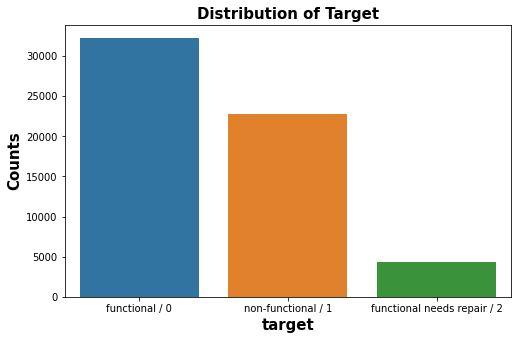

In [68]:
feature_distribution(df_1, col='target',ticklabels=['functional / 0','non-functional / 1','functional needs repair / 2'],figsize=(8,5))

#### district_code
The below plot shows that districts 1,2,3 4 have the highest number of performing wells.  However, there is also a large number of non-functioning wells.  

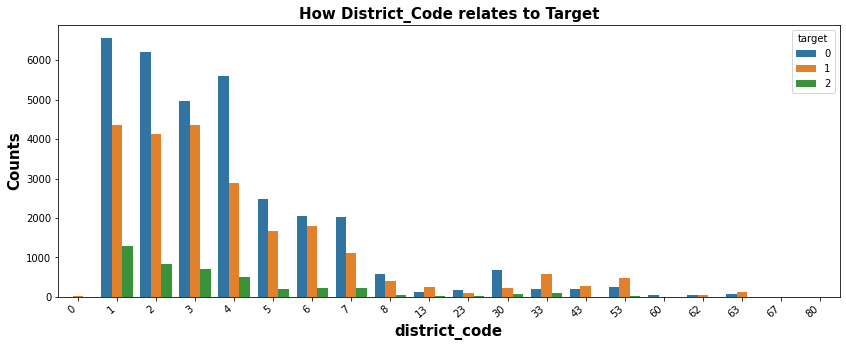

In [69]:
feature_w_hue(df_2, col='district_code', hue_col='target',rot=40,figsize=(14,5))

#### funder
We were looking to see if the top funders give us some indcation of the functionlaity of the wells.  Other is the largest category which isn't helpful because it's not specific. Government Of Tanzania is the next largest group and they have funded 9084 wells.  A little over 4,000 wells are functioning but around 5,000 wells aren't functioning.  

In [70]:
df_3 = df_2.copy()

In [71]:
df_2['funder'].value_counts(dropna=False).head(20)


other                     12379
Government Of Tanzania     9084
0                          4412
Danida                     3114
Hesawa                     2202
Rwssp                      1374
World Bank                 1349
Kkkt                       1287
World Vision               1246
Unicef                     1057
Tasaf                       877
District Council            843
Dhv                         829
Private Individual          826
Dwsp                        811
Norad                       765
Germany Republi             610
Tcrs                        602
Ministry Of Water           590
Water                       583
Name: funder, dtype: int64

In [72]:
funder_10 = df_3[(df_3['funder'] == 'other') | (df_3["funder"] == 'Government Of Tanzania')
                 |(df_3["funder"] == '0')| (df_3["funder"] == 'Danida')
                 |(df_3["funder"] == 'Hesawa') |(df_3["funder"] == 'Rwssp') 
                 |(df_3["funder"] == 'World Bank') |(df_3["funder"] == 'Kkkt')
                 | (df_3["funder"] == 'World Vision')| (df_3["funder"] == 'Unicef')
                  | (df_3["funder"] == 'Tasaf')]
funder_10.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,target,age,pop_per_year
1,0.0,2013-03-06,other,1399.000000,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,1,GeoData Consultants Ltd,Other,NaN,1,2010.000000,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0,3.000000,93.333333
2,25.0,2013-02-25,other,686.000000,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,1,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,1,2009.000000,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,0,4.000000,62.500000
3,0.0,2013-01-28,Unicef,263.000000,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,1,GeoData Consultants Ltd,VWC,NaN,1,1986.000000,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,1,27.000000,2.148148
4,0.0,2011-07-13,other,1018.860839,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,281,1,GeoData Consultants Ltd,Unknown,NaN,1,1996.814686,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0,14.185314,19.809219
7,0.0,2012-10-09,Rwssp,1018.860839,DWE,32.620617,-4.226198,Tushirikiane,0,Lake Tanganyika,Nyawishi Center,Shinyanga,17,3,Kahama,Chambo,281,1,GeoData Consultants Ltd,Unknown,NaN,1,1996.814686,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,1,15.185314,18.504721


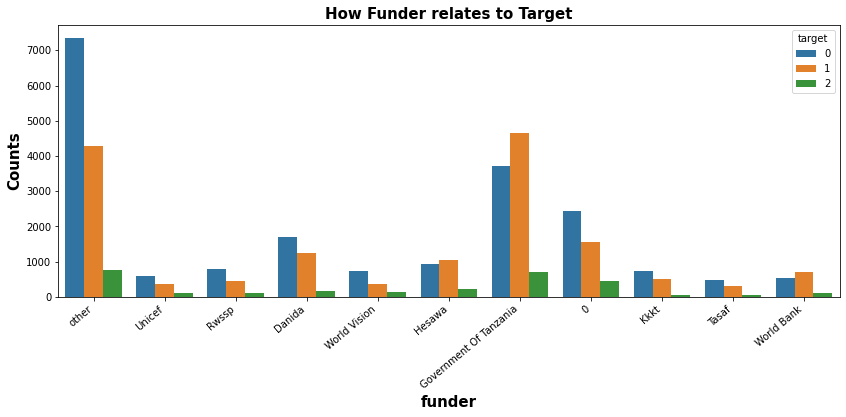

In [73]:
feature_w_hue(funder_10, col='funder', hue_col='target',rot=40,figsize=(14,5))

#### Does location impact functionality of a well
The below plot is really helpful because it shows where the wells are located and their functionality.  In the southeast section there is a cluster of non-functioning wells.  Further research is warranted.  Is there any correlation with district, population?

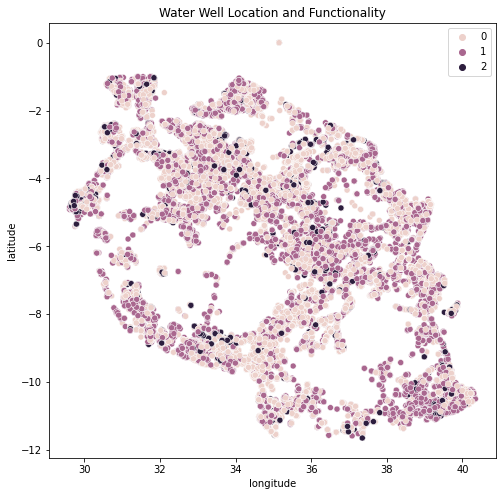

In [74]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='longitude', y='latitude', hue='target', data=df_2)#, ax=ax
plt.title('Water Well Location and Functionality')
plt.legend();

#### Does region_code impact functionality?
It's interesting to see which districts have the highest number of wells and their status.  Region 
11 has highest number of wells and around 4,200 are functioning, around 1,000 are non-functioning and
around 100 are in eed of repairs.  Region 17 has 3,000 functioning wells and 1,500 are non-functioning.  
The plot gives us a quick summary of the number of wells in each district and their status.  It shoes
that regions 8,9,40, 60, 80, 90 and 99 have very few wells and most are non-functioning.

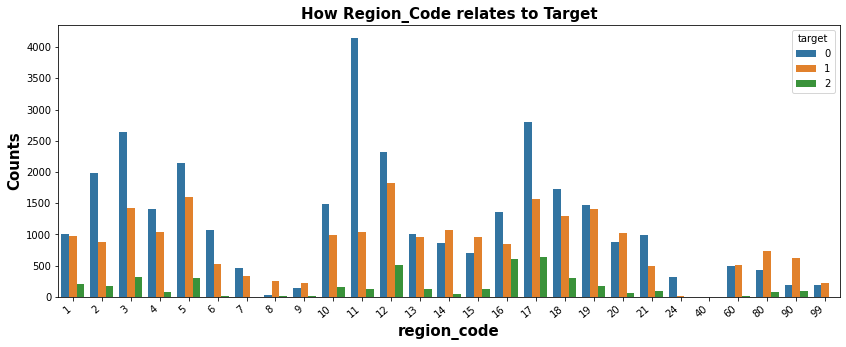

In [96]:
feature_w_hue(df_2, col='region_code', hue_col='target',rot=40,figsize=(14,5))

### Does the quality of the water impact functionality
The plot show that there are 6 kinds of wate quality.  The majority of the wells fall under the category of 
of good and around 39,000 are functioning.  Around 18,000 are non-functioning.  If the well good water quality there is a higher chance that it is functioning but there is still a high probability it's not working. 

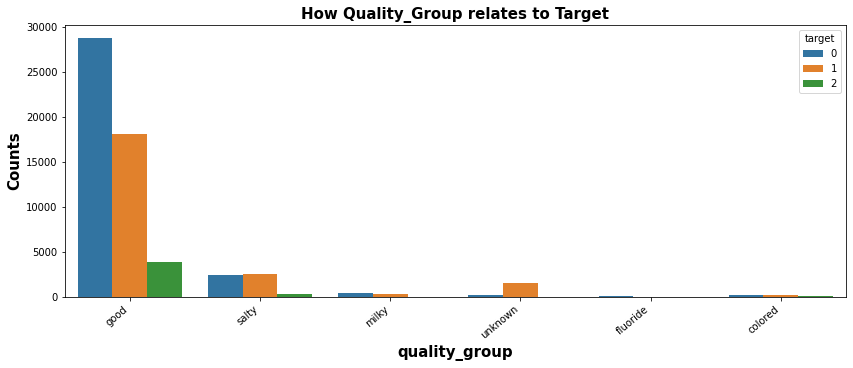

In [97]:
feature_w_hue(df_2, col='quality_group', hue_col='target',rot=40,figsize=(14,5))

#### Does quantity of water impact well functionality?
The below plot shows that wells with enough water constitute the largest number of wells and the 
highest functionality.  There are around 24,000 functioning wells with enough water and with wells with 
enough water around 9,000 are non-functioning.  Based on the below it looks like if the well has a enought water 
it contributing to the functionality of the well.

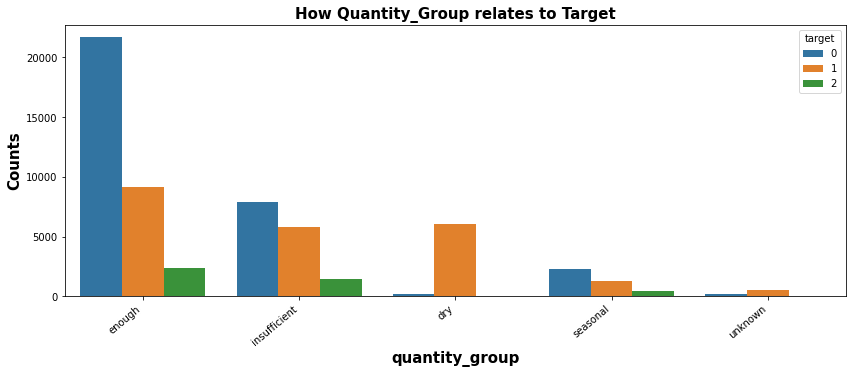

In [182]:
feature_w_hue(df_2, col='quantity_group', hue_col='target',rot=40,figsize=(14,5))

In [184]:
sample = count_value_status(df_2, 'age').head(20)
sample

,count,per,%
14.185314,13343,0.224630,22.46%
15.185314,5142,0.086566,8.66%
3.000000,2740,0.046128,4.61%
1.000000,2303,0.038771,3.88%
16.185314,2210,0.037205,3.72%
2.000000,2129,0.035842,3.58%
5.000000,1980,0.033333,3.33%
4.000000,1890,0.031818,3.18%
13.000000,1869,0.031465,3.15%
7.000000,1404,0.023636,2.36%


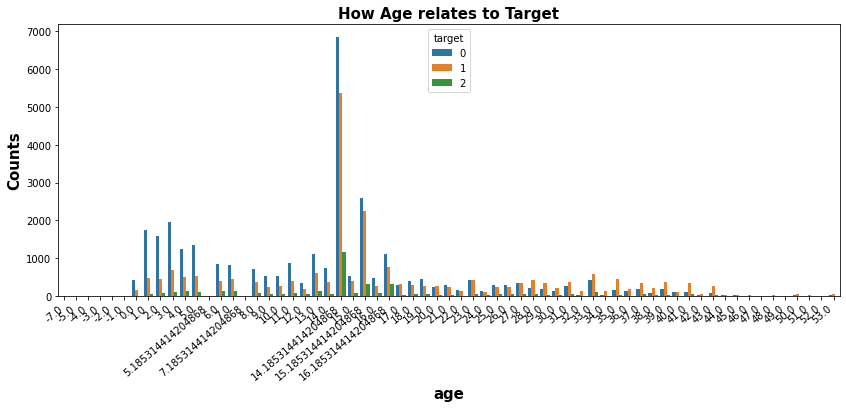

In [167]:
feature_w_hue(df_2, col='age', hue_col='target',rot=40,figsize=(14,5))

### Pre-processing of Data
The pre-processing of the data will involve One-Hot Encoding the features with object data types because
non-numeric values can't be inputted into the models.  In addition, this is a ternary classification problem because the target has three classifiction values: functional, non functional and functional needs repair. As displayed above we can see that value_counts are not balanced.  This could impact the accuracy of the model's performance.  I  ran the SMOTE method the training set to resample the set and get equal values for each category. 

In [75]:
cols_obj = ['funder','installer','basin','lga','scheme_management','extraction_type_class','management','payment','quality_group',
            'quantity_group','source','waterpoint_type']
cols_num = ['gps_height','latitude','longitude','district_code','region_code','permit','construction_year','population','age','pop_per_year']

df_3 = df_2[cols_obj]
df_4 = df_2[cols_num]

In [76]:
df_3.head()

,funder,installer,basin,lga,scheme_management,extraction_type_class,management,payment,quality_group,quantity_group,source,waterpoint_type
0,Roman,Roman,Lake Nyasa,Ludewa,VWC,gravity,vwc,pay annually,good,enough,spring,communal standpipe
1,other,GRUMETI,Lake Victoria,Serengeti,Other,gravity,wug,never pay,good,insufficient,rainwater harvesting,communal standpipe
2,other,World vision,Pangani,Simanjiro,VWC,gravity,vwc,pay per bucket,good,enough,dam,communal standpipe multiple
3,Unicef,UNICEF,Ruvuma / Southern Coast,Nanyumbu,VWC,submersible,vwc,never pay,good,dry,machine dbh,communal standpipe multiple
4,other,Artisan,Lake Victoria,Karagwe,Unknown,gravity,other,never pay,good,seasonal,rainwater harvesting,communal standpipe


In [77]:
df_4.describe()

,gps_height,latitude,longitude,district_code,region_code,permit,construction_year,population,age,pop_per_year
count,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,1018.860839,-5.706033e+00,35.149669,5.629747,15.297003,0.705522,1996.814686,281.055791,15.106981,43.561193
std,496.110517,2.946019e+00,2.567349,9.633649,17.587406,0.455812,10.065781,451.765815,10.096816,203.103031
min,-90.000000,-1.164944e+01,29.607122,0.000000,1.000000,0.000000,1960.000000,1.000000,-7.000000,-900.000000
25%,903.000000,-8.540621e+00,33.354079,2.000000,5.000000,0.000000,1996.000000,100.000000,8.000000,7.575758
50%,1018.860839,-5.021597e+00,35.149669,3.000000,12.000000,1.000000,1996.814686,281.000000,14.185314,18.504721
75%,1319.250000,-3.326156e+00,37.178387,5.000000,17.000000,1.000000,2004.000000,281.000000,16.185314,21.811688
max,2770.000000,-2.000000e-08,40.345193,80.000000,99.000000,1.000000,2013.000000,30500.000000,53.000000,10166.666667


#### One-Hot Encoding

In [78]:
one_hot_df = pd.get_dummies(df_3, cols_obj, drop_first=True)

In [79]:
one_hot_df.head()

funder_Adb  funder_Adra  funder_African  funder_Amref  \
0           0            0               0             0   
1           0            0               0             0   
2           0            0               0             0   
3           0            0               0             0   
4           0            0               0             0   

   funder_Anglican Church  funder_Bsf  funder_Ces (gmbh)  funder_Ces(gmbh)  \
0                       0           0                  0                 0   
1                       0           0                  0                 0   
2                       0           0                  0                 0   
3                       0           0                  0                 0   
4                       0           0                  0                 0   

   funder_Co  funder_Community  funder_Concern  funder_Concern World Wide  \
0          0                 0               0                          0   
1          0                 0               0                          0   
2          0                 0               0                          0   
3          0                 0               0                          0   
4          0                 0               0                          0   

   funder_Danida  funder_Ded  funder_Dfid  funder_Dh  funder_Dhv  \
0              0           0            0          0           0   
1              0           0            0          0           0   
2              0           0            0          0           0   
3              0           0            0          0           0   
4              0           0            0          0           0   

   funder_District Council  funder_Dmdd  funder_Dwe  funder_Dwsp  \
0                        0            0           0            0   
1                        0            0           0            0   
2                        0            0           0            0   
3                        0            0           0            0   
4                        0            0           0            0   

   funder_Fini Water  funder_Finw  funder_Fw  funder_Germany  \
0                  0            0          0               0   
1                  0            0          0               0   
2                  0            0          0               0   
3                  0            0          0               0   
4                  0            0          0               0   

   funder_Germany Republi  funder_Go  funder_Government Of Tanzania  \
0                       0          0                              0   
1                       0          0                              0   
2                       0          0                              0   
3                       0          0                              0   
4                       0          0                              0   

   funder_Halmashauri Ya Wilaya Sikonge  funder_He  funder_Hesawa  \
0                                     0          0              0   
1                                     0          0              0   
2                                     0          0              0   
3                                     0          0              0   
4                                     0          0              0   

   funder_Hifab  funder_Hsw  funder_Ir  funder_Is  funder_Isf  funder_Jaica  \
0             0           0          0          0           0             0   
1             0           0          0          0           0             0   
2             0           0          0          0           0             0   
3             0           0          0          0           0             0   
4             0           0          0          0           0             0   

   funder_Jica  funder_Ki  funder_Kiliwater  funder_Kkkt  funder_Kkkt_makwale  \
0            0          0                 0            0                    0   
1            0          0   

In [80]:
one_hot_df.shape

(59400, 2417)

In [81]:
result = pd.concat([df_4, one_hot_df], axis=1)
result.head()

gps_height   latitude  longitude  district_code  region_code  permit  \
0  1390.000000  -9.856322  34.938093              5           11       0   
1  1399.000000  -2.147466  34.698766              2           20       1   
2   686.000000  -3.821329  37.460664              4           21       1   
3   263.000000 -11.155298  38.486161             63           90       1   
4  1018.860839  -1.825359  31.130847              1           18       1   

   construction_year  population        age  pop_per_year  funder_Adb  \
0        1999.000000         109  12.000000      9.083333           0   
1        2010.000000         280   3.000000     93.333333           0   
2        2009.000000         250   4.000000     62.500000           0   
3        1986.000000          58  27.000000      2.148148           0   
4        1996.814686         281  14.185314     19.809219           0   

   funder_Adra  funder_African  funder_Amref  funder_Anglican Church  \
0            0               0             0                       0   
1            0               0             0                       0   
2            0               0             0                       0   
3            0               0             0                       0   
4            0               0             0                       0   

   funder_Bsf  funder_Ces (gmbh)  funder_Ces(gmbh)  funder_Co  \
0           0                  0                 0          0   
1           0                  0                 0          0   
2           0                  0                 0          0   
3           0                  0                 0          0   
4           0                  0                 0          0   

   funder_Community  funder_Concern  funder_Concern World Wide  funder_Danida  \
0                 0               0                          0              0   
1                 0               0                          0              0   
2                 0               0                          0              0   
3                 0               0                          0              0   
4                 0               0                          0              0   

   funder_Ded  funder_Dfid  funder_Dh  funder_Dhv  funder_District Council  \
0           0            0          0           0                        0   
1           0            0          0           0                        0   
2           0            0          0           0                        0   
3           0            0          0           0                        0   
4           0            0          0           0                        0   

   funder_Dmdd  funder_Dwe  funder_Dwsp  funder_Fini Water  funder_Finw  \
0            0           0            0                  0            0   
1            0           0            0                  0            0   
2            0           0            0                  0            0   
3            0           0            0                  0            0   
4            0           0            0                  0            0   

   funder_Fw  funder_Germany  funder_Germany Republi  funder_Go  \
0          0               0                       0          0   
1          0               0                       0          0   
2          0               0                       0          0   
3          0               0                       0          0   
4          0               0                       0          0   

   funder_Government Of Tanzania  funder_Halmashauri Ya Wilaya Sikonge  \
0                              0                                     0   
1                              0                                     0   
2                              0                                     0   
3                              0                                     0   
4                              0                                     0   

   funder_He  funder_Hesawa  

In [82]:
result.shape

(59400, 2427)

In [83]:
 from sklearn.model_selection import train_test_split

In [84]:
X = result.copy()
y = df_2['target']

In [85]:
from imblearn.over_sampling import SMOTE

#### Train/Test Split 

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [87]:
from sklearn.preprocessing import MinMaxScaler

#### SMOTE

In [88]:
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)

In [89]:
print(X_train_resampled.shape)
print(y_train_resampled.shape)
print(X_test.shape)
print(y_test.shape)

(72483, 2427)
(72483,)
(14850, 2427)
(14850,)


In [90]:

model_dict = {
    'KNN': { 'model' : KNeighborsClassifier(),
                         'params' : { 
                                        "n_neighbors" : [3,5,7,9,11,15],#,5,7,9,11,13,15
                                        "weights" : ['uniform', 'distance']}
             },
    'logisticR': { 'model' : LogisticRegression(),
                         'params' : { 
                             'fit_intercept':[False], 
                             'C':[1e12], 
                             'solver':['liblinear']}
             },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
             'bootstrap': [True],
            #'max_depth': [80, 90],
            'max_features': ['auto', 'sqrt'],
            #'min_samples_leaf': [3, 4, 5],
            'min_samples_split': [5, 10],
            'n_estimators': [100,200],#[100, 200, 300,500]
            # 'n_estimators': [100,150],
            # #'max_depth': [int(x) for x in np.linspace(10, 15, num = 11)],
            # 'max_features': ['auto', 'sqrt'],
            #  'min_samples_split': [5,10],
             'class_weight':['balanced'],
              'criterion' :['gini', 'entropy']}
             }


              
              }

In [91]:

scores = []
for model_name, mp in model_dict.items():
     clf = GridSearchCV(mp['model'], mp['params'],cv=5,  return_train_score=False) #refit='f1_weighted',
     clf.fit(X_train, y_train)
     y_pred = clf.predict(X_test) 
    
     accuracy = accuracy_score(y_test, y_pred)
     scores.append({
      'model':model_name,
      'accuracy': accuracy,
      'best params': clf.best_params_
      })
pd.set_option('display.max_colwidth', None)    
gscv_models = pd.DataFrame(scores) #, columns=['model', 'accuracy', 'f1', 'roc','best score','best params']
gscv_models

,model,accuracy,best params
0,KNN,0.697037,"{'n_neighbors': 15, 'weights': 'distance'}"
1,logisticR,0.758788,"{'C': 1000000000000.0, 'fit_intercept': False, 'solver': 'liblinear'}"


In [92]:
def eval_classification_model(X_train_resampled, X_test, y_train_resampled, y_pred,
                              normalize='true',cmap='Blues',figsize=[10,5]):
      
    # Classification Report / Accuracy Score 
    print(dashes)
    print("Classification Report")
    print(dashes)
    classes = ['0/Functional','1/Non-functioning','2/Needs Repair']
    print(metrics.classification_report(y_test,y_pred,target_names=classes))  
    print(dashes)
    print('\n')
   
    plt.figure(figsize=(8,8))
    rf_cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(rf_cm, annot=True, fmt="d", cmap='Blues')    

In [93]:
logisticR_params = gscv_models.iloc[1]['best params']
logisticR = LogisticRegression(**logisticR_params)
model = logisticR.fit(X_train_resampled, y_train_resampled)
y_pred=model.predict(X_test)

------------------------------------------------------------
Classification Report
------------------------------------------------------------
                   precision    recall  f1-score   support

     0/Functional       0.77      0.78      0.77      8098
1/Non-functioning       0.79      0.66      0.72      5678
   2/Needs Repair       0.26      0.45      0.32      1074

         accuracy                           0.71     14850
        macro avg       0.60      0.63      0.60     14850
     weighted avg       0.74      0.71      0.72     14850

------------------------------------------------------------




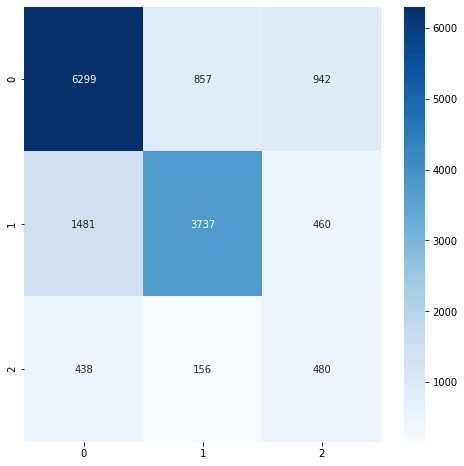

In [94]:
model = eval_classification_model(X_train_resampled, X_test, 
                 y_train_resampled, y_pred)

In [95]:
rf_params = gscv_models.iloc[2]['best params']
rf = RandomForestClassifier(**rf_params)
model_rf = rf.fit(X_train_resampled, y_train_resampled)
y_pred_rf=model_rf.predict(X_test)

IndexError: single positional indexer is out-of-bounds

In [ ]:
model_rf = eval_classification_model(X_train_resampled, X_test, 
                 y_train_resampled, y_pred_rf)

In [ ]:
df_data = df_2.drop('target',axis=1)

In [ ]:
importances = model_rf.feature_importances_
indices = np.argsort(importances)

features = df_data.columns
plt.figure(figsize=(12,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [ ]:
#NO don't use
# param_grid = {'learning_rate': [0.075, 0.07],
#                       'max_depth': [6, 7],
#                       'min_samples_leaf': [7,8],
#                       'max_features': [1.0],
#                       'n_estimators':[100, 200]} 

# rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1,
#                             criterion= 'entropy',max_features= 'sqrt',
#                              min_samples_split= 10,class_weight='balanced')


In [ ]:
#put is null values in unknown category
# df_2['installer'] = np.where(df_2['installer'].isnull(),"Unknown",df_2['installer'])

# df_2['installer'] = np.where(df_2['installer'].isnull(),"Unknown",df_2['installer'])

# amount_tsh_mean = df_2[df_2['amount_tsh']>0]['amount_tsh'].mean()
# df_2.loc[df_2['amount_tsh']==0, 'amount_tsh'] = int(amount_tsh_mean)

# #Matt Kirby
# features['construction_year'] = features['construction_year'].replace({0:1993})
# features['age'] = features['date_recorded'].astype(str).str[:4].astype(int) - features['construction_year']
# features['pop/year'] = features['population'].replace({0:1}) / features['age'].replace({0:1})

# features['water_/_person'] = features['amount_tsh'].replace({0:1}) / features['population'].replace({0:1})